## Social media vs emotions

![python logo](https://letsgethappi.com/wp-content/uploads/2023/11/Social-Media-and-Mental-Health-1.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [4]:
train.tail()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger
1000,1000,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral


In [5]:
test.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [6]:
test.tail()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
98,184,22,Male,Twitter,70,1,20,5,22,Neutral
99,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,708,24,Non-binary,Facebook,110,6,35,23,25,Sadness
101,993,24,Male,Telegram,75,3,37,16,22,Neutral
102,60,27,Male,Facebook,60,1,10,4,15,Boredom


In [7]:
train.shape

(1001, 10)

In [8]:
test.shape

(103, 10)

In [9]:
train.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [10]:
test.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [11]:
train.dtypes

User_ID                        object
Age                            object
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

In [12]:
test.dtypes

User_ID                        int64
Age                           object
Gender                        object
Platform                      object
Daily_Usage_Time (minutes)     int64
Posts_Per_Day                  int64
Likes_Received_Per_Day         int64
Comments_Received_Per_Day      int64
Messages_Sent_Per_Day          int64
Dominant_Emotion              object
dtype: object

In [13]:
train.info

<bound method DataFrame.info of      User_ID Age      Gender   Platform  Daily_Usage_Time (minutes)  \
0          1  25      Female  Instagram                       120.0   
1          2  30        Male    Twitter                        90.0   
2          3  22  Non-binary   Facebook                        60.0   
3          4  28      Female  Instagram                       200.0   
4          5  33        Male   LinkedIn                        45.0   
...      ...  ..         ...        ...                         ...   
996      996  33  Non-binary    Twitter                        85.0   
997      997  22      Female   Facebook                        70.0   
998      998  35        Male   Whatsapp                       110.0   
999      999  28  Non-binary   Telegram                        60.0   
1000    1000  27      Female   Snapchat                       120.0   

      Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0               3.0                    45

In [14]:
test.info

<bound method DataFrame.info of      User_ID Age      Gender  Platform  Daily_Usage_Time (minutes)  \
0        500  27      Female  Snapchat                         120   
1        488  21  Non-binary  Snapchat                          60   
2        776  28  Non-binary  Snapchat                         115   
3        869  27        Male  Telegram                         105   
4        573  21  Non-binary  Facebook                          55   
..       ...  ..         ...       ...                         ...   
98       184  22        Male   Twitter                          70   
99       896  33        Male  LinkedIn                          85   
100      708  24  Non-binary  Facebook                         110   
101      993  24        Male  Telegram                          75   
102       60  27        Male  Facebook                          60   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0                4                      40            

In [15]:
train.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


In [16]:
test.describe()

,User_ID,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,521.262136,88.009709,2.864078,33.456311,13.766990,20.388350
std,288.949991,33.979087,1.732326,23.031426,8.107372,7.372755
min,16.000000,40.000000,1.000000,5.000000,2.000000,10.000000
25%,275.000000,60.000000,1.000000,15.000000,7.000000,15.000000
50%,526.000000,75.000000,2.000000,27.000000,12.000000,20.000000
75%,776.000000,105.000000,4.000000,40.000000,19.500000,25.000000
max,997.000000,200.000000,8.000000,110.000000,40.000000,45.000000


In [17]:
train['Gender'].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

In [18]:
def clean_column_gender(col):
    try:
        int(col)
        return 'Uncertain'
    except:
        return col

train['Gender'] = train['Gender'].apply(clean_column_gender)
train['Gender'] = train['Gender'].fillna('Uncertain')


test['Gender'] = test['Gender'].apply(clean_column_gender)
test['Gender'] = test['Gender'].fillna('Uncertain')

In [19]:
train.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

In [20]:
train = train.fillna(0)
test = test.fillna(0)

In [21]:
train['Gender'].unique()

array(['Female', 'Male', 'Non-binary', 'Uncertain'], dtype=object)

In [22]:
def clean_column_age(col):
    try:
        int(col)
        return int(col)
    except:
        return 0

train['Age'] = train['Age'].apply(clean_column_age)
train['Age'] = train['Age'].fillna(0)

test['Age'] = test['Age'].apply(clean_column_age)
test['Age'] = test['Age'].fillna(0)

In [23]:
train['Age'].unique()

array([25, 30, 22, 28, 33, 21, 27, 24, 29, 31, 23, 26, 34, 35, 32,  0],
      dtype=int64)

In [24]:
train.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [25]:
test.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [26]:
train["Platform"].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat', 0], dtype=object)

In [27]:
test["Platform"].unique()

array(['Snapchat', 'Telegram', 'Facebook', 'Instagram', 'LinkedIn',
       'Twitter', 'Whatsapp'], dtype=object)

In [28]:
train["Age"].unique()

array([25, 30, 22, 28, 33, 21, 27, 24, 29, 31, 23, 26, 34, 35, 32,  0],
      dtype=int64)

In [29]:
train["Dominant_Emotion"].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness',
       0], dtype=object)

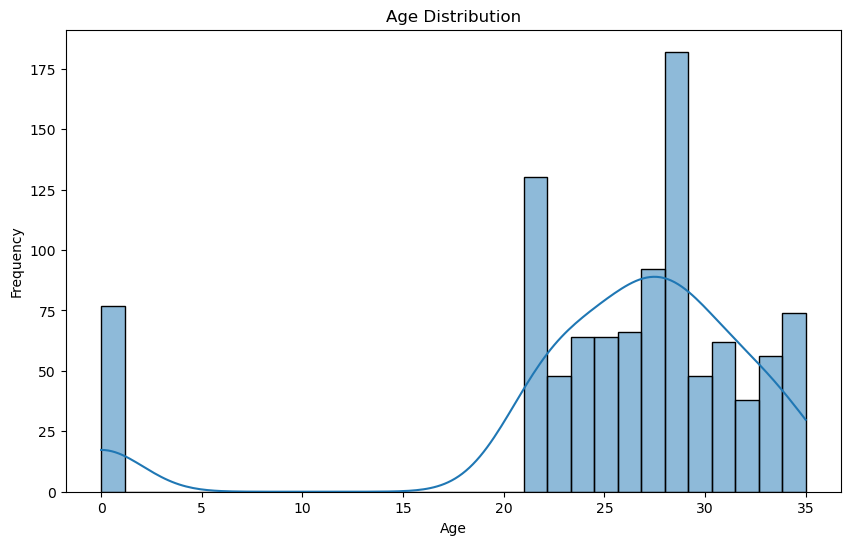

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("Age Distribution.png")
plt.show()

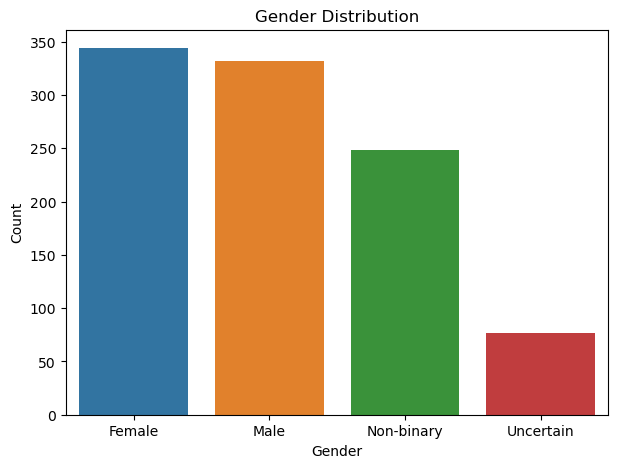

In [31]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=train)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig("Gender Distribution.png")
plt.show()

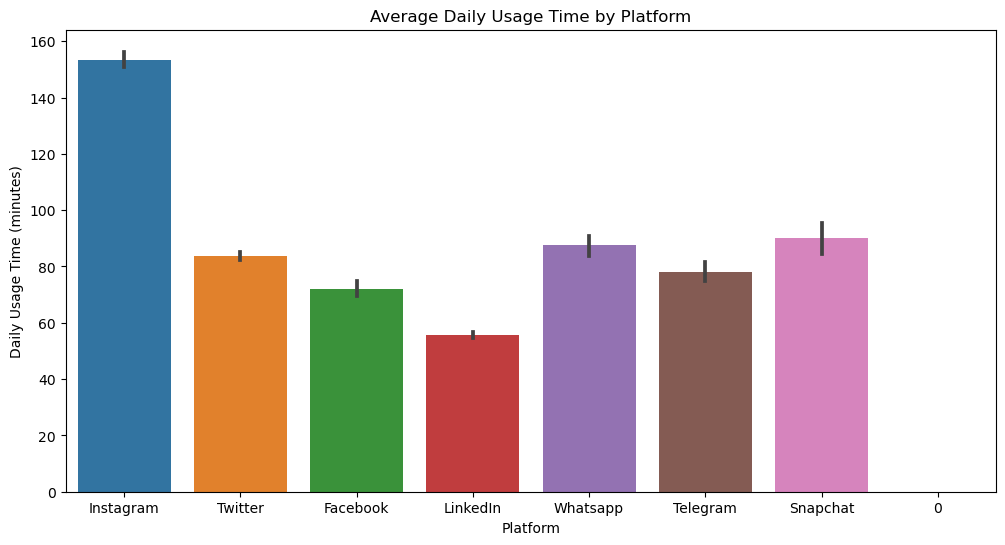

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=train, estimator=np.mean)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.savefig("Average Daily Usage Time by Platform.png")
plt.show()

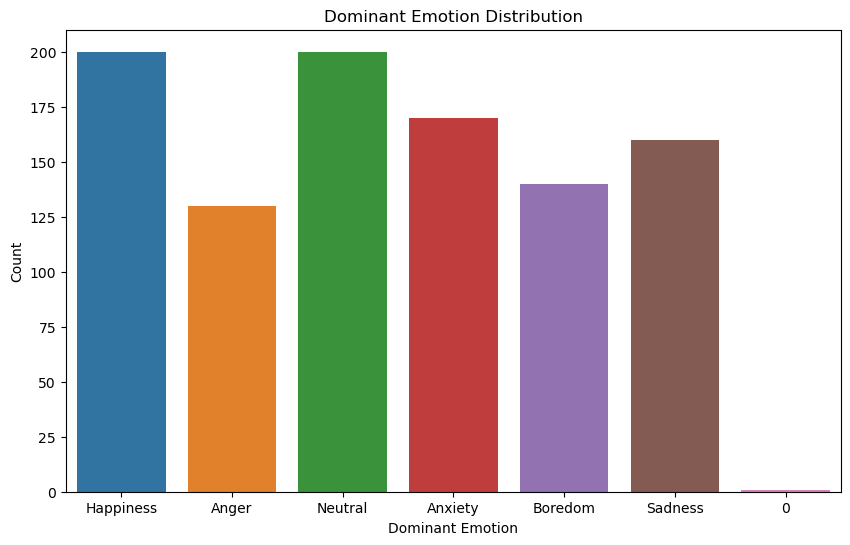

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', data=train)
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.savefig("Dominant Emotion Distribution.png")
plt.show()

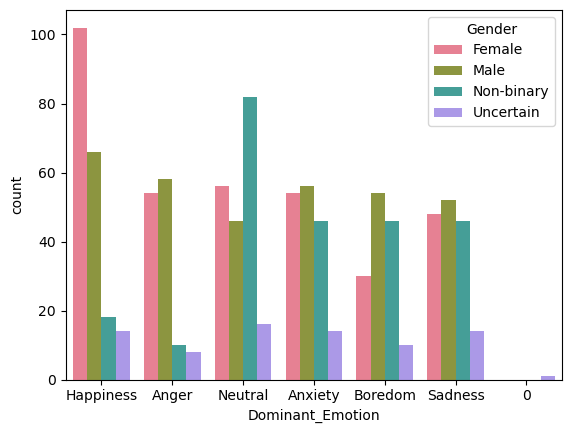

In [34]:
sns.countplot(x='Dominant_Emotion', hue='Gender', data=train, palette="husl")
plt.savefig("Gender vs Dominant Emotion.png")
plt.show()

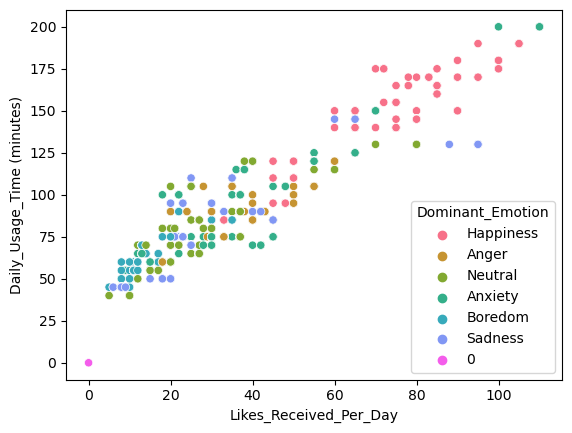

In [35]:
sns.scatterplot(train, x='Likes_Received_Per_Day', y='Daily_Usage_Time (minutes)', hue='Dominant_Emotion', palette="husl", sizes=5)
plt.savefig("Likes_Received_Per_Day vs Daily_Usage_Time (minutes) depending on Dominant_Emotion.png")
plt.show()

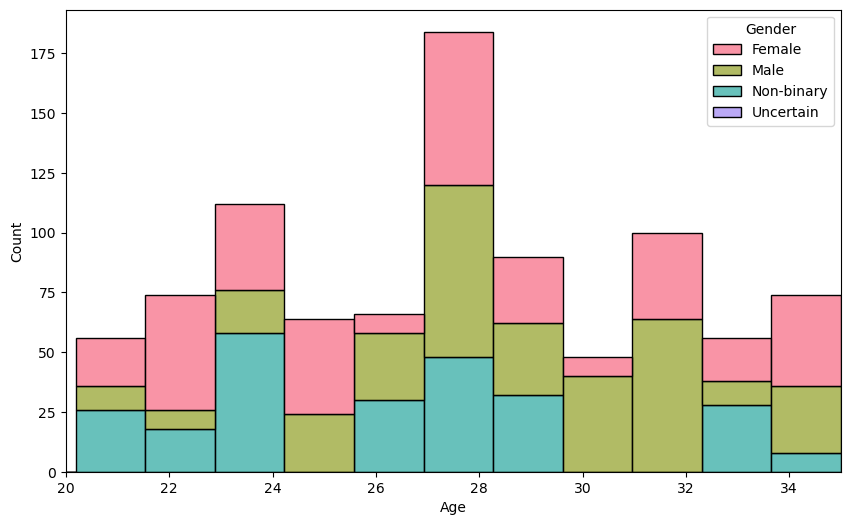

In [36]:
plt.figure(figsize=(10, 6))
boxplot = sns.histplot(train, x='Age', hue='Gender', palette='husl', multiple="stack")
boxplot.set_xlim(20, 35)
plt.savefig("Age vs Gender.png")
plt.show()

In [37]:
train['Gender'] = train['Gender'].map({'Uncertain': 0, 'Female': 1, 'Male': 2, 'Non-binary':3})
test['Gender'] = test['Gender'].map({'Uncertain': 0, 'Female': 1, 'Male': 2, 'Non-binary':3}, na_action='ignore')
test['Gender'] = test['Gender'].fillna(0)

In [38]:
test['Dominant_Emotion'].unique()

array(['Neutral', 'Anxiety', 'Happiness', 'Boredom', 'Sadness', 'Anger'],
      dtype=object)

In [39]:
train['Dominant_Emotion'] = train['Dominant_Emotion'].map({'Happiness': 0, 'Anger': 1, 'Neutral': 2, 'Anxiety': 3, 'Boredom': 4, 'Sadness': 5, 0: 0})
test['Dominant_Emotion'] = test['Dominant_Emotion'].map({'Happiness': 0, 'Anger': 1, 'Neutral': 2, 'Anxiety': 3, 'Boredom': 4, 'Sadness': 5})

In [40]:
x_train = train.drop(['Dominant_Emotion', 'User_ID', 'Platform'], axis=1)
y_train = train['Dominant_Emotion']

x_test = test.drop(['Dominant_Emotion', 'User_ID', 'Platform'], axis=1)
y_test = test['Dominant_Emotion']

In [41]:

boost_params = {
    'n_estimators': [500,1000],
    'learning_rate': [0.02, 0.05],
    'max_depth': [1, 2],
    'min_samples_leaf': [5,10],
    'min_samples_split': [5,10]
}

boost_model = GradientBoostingRegressor()

In [42]:
boost_grid = GridSearchCV(boost_model, boost_params, cv=3, n_jobs=-1, error_score='raise')
boost_grid.fit(x_train, y_train)
y_pred = boost_grid.predict(x_test)
mean_squared_error(y_test, y_pred)

0.3168117363164271

In [43]:
knn_params = {"knn__n_neighbors": range(1, 100)}
knn_pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsRegressor(n_jobs=-1))])
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(x_train, y_train)
y_pred_k = knn_grid.predict(x_test)
mean_squared_error(y_test, y_pred_k)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


0.4174757281553398